In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator

In [6]:
np.random.seed(123)
data = sim_randomwalk(n_series=3, timesteps=200, 
                      process_noise=10, measure_noise=30)
data.shape  # (n_series, timesteps)

(3, 200)

In [3]:
class LowessSmootherWrap(TransformerMixin, BaseEstimator, LowessSmoother):

    def fit(self, X, y=None):
        self._is_fitted = True
        return self

    def transform(self, X, y=None):
        self.smooth(X)
        return self.smooth_data

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [4]:
smoother = LowessSmootherWrap(smooth_fraction=0.1, iterations=1)
smoother.fit(data)

LowessSmootherWrap(smooth_fraction=0.1)

In [5]:
smoothdata = smoother.fit_transform(data)
smoothdata.shape  # (n_series, timesteps)

(3, 200)

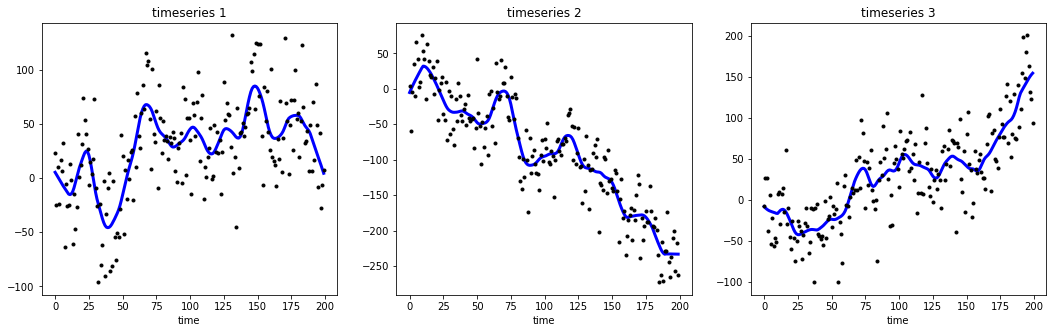

In [7]:
plt.figure(figsize=(18,5))

for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoothdata[i], linewidth=3, color='blue')
    plt.plot(data[i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')

In [8]:
class LowessSmootherWrap(TransformerMixin, BaseEstimator, LowessSmoother):

    def fit(self, X, y=None):
        self._is_fitted = True
        return self

    def transform(self, X, y=None):
        self.smooth(X.T)            # w/ Transpose
        return self.smooth_data.T   # w/ Transpose

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [9]:
smoother = LowessSmootherWrap(smooth_fraction=0.1, iterations=1)
pipe = make_pipeline(StandardScaler(), smoother)

In [10]:
smoothdata = pipe.fit_transform(data.T)  # w/ Transpose
smoothdata.shape  # (timesteps, n_series)

(200, 3)

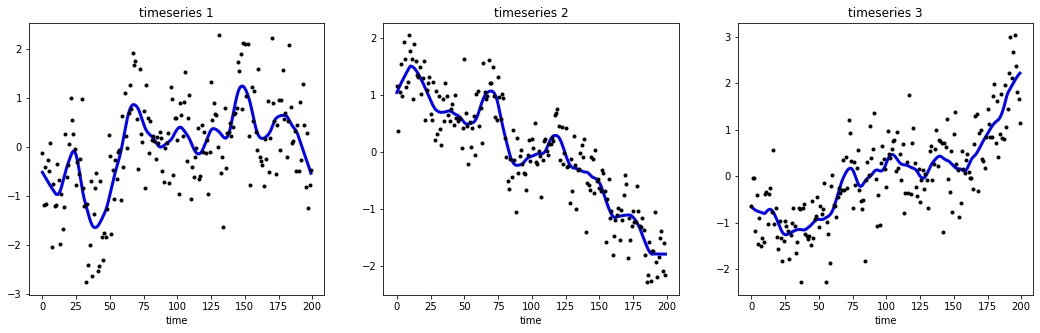

In [11]:
scaled_data = pipe.named_steps['standardscaler'].transform(data.T)

plt.figure(figsize=(18,5))

for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoothdata[:,i], linewidth=3, color='blue')
    plt.plot(scaled_data[:,i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')